In [1]:
# Project 1

In [383]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [384]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-16 19:58:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-06-16 19:58:41 (12.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [385]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [386]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [387]:
df['Gender'].replace(to_replace =['female','male'],value=[1,0],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,0
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,0


In [388]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [389]:
df['loan_status'].replace(to_replace =['COLLECTION','PAIDOFF'],value=[1,0],inplace=True)
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,9/8/2016,10/7/2016,45,High School or Below,0
1,2,2,0,1000,30,9/8/2016,10/7/2016,33,Bechalor,1
2,3,3,0,1000,15,9/8/2016,9/22/2016,27,college,0
3,4,4,0,1000,30,9/9/2016,10/8/2016,28,college,1
4,6,6,0,1000,30,9/9/2016,10/8/2016,29,college,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc875b1acf8>]],
      dtype=object)

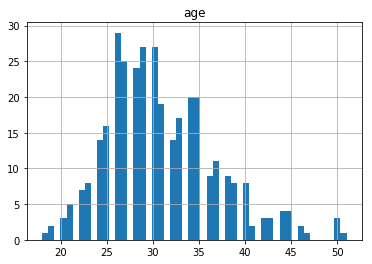

In [390]:
df.hist(column='age',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc87618f4e0>]],
      dtype=object)

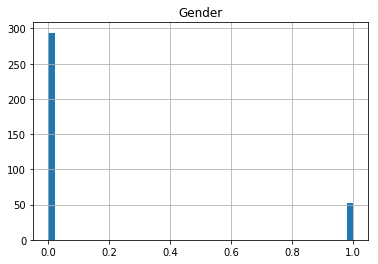

In [391]:
df.hist(column='Gender',bins=50)
# 1=female, 0=male

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc87619c588>]],
      dtype=object)

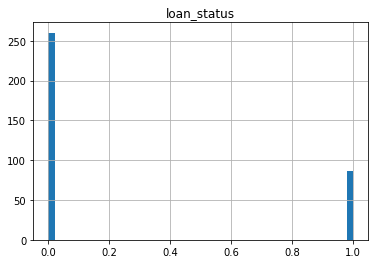

In [392]:
df.hist(column='loan_status',bins=50)
# 1=COLLECTION, 0=PAIDOFF

In [393]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [394]:
X = df[['loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender']].values
X[0:5]

array([[0, 1000, 30, '9/8/2016', '10/7/2016', 45, 'High School or Below',
        0],
       [0, 1000, 30, '9/8/2016', '10/7/2016', 33, 'Bechalor', 1],
       [0, 1000, 15, '9/8/2016', '9/22/2016', 27, 'college', 0],
       [0, 1000, 30, '9/9/2016', '10/8/2016', 28, 'college', 1],
       [0, 1000, 30, '9/9/2016', '10/8/2016', 29, 'college', 0]],
      dtype=object)

In [395]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [396]:
y=df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [397]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])

In [398]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0


In [399]:
df['dayofweek']=df['effective_date'].dt.dayofweek

In [400]:
df['weekend']=df['dayofweek'].apply(lambda x:1 if (x>3) else 0)

In [401]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [402]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
# 1=female, 0=male

Gender  loan_status
0       0              0.731293
        1              0.268707
1       0              0.865385
        1              0.134615
Name: loan_status, dtype: float64

In [403]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

In [404]:
Feature=df[['Principal','terms','age','Gender','weekend','dayofweek']]

In [405]:
Feature=pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)

In [406]:
Feature.drop(['Master or Above'],axis=1,inplace=True)

In [407]:
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


Select Feature

In [408]:
X=Feature

In [409]:
X[0:10]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1
5,1000,30,36,0,1,4,0,0,1
6,1000,30,28,0,1,4,0,0,1
7,800,15,26,0,1,5,0,0,1
8,300,7,29,0,1,5,0,0,1
9,1000,15,39,0,1,5,0,1,0


In [410]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

In [411]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


# Classification


# K nearest neighbor (KNN)

Import library

Classifier implementing the k-nearest neighbors vote.

In [412]:
from sklearn.neighbors import KNeighborsClassifier

In [413]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [414]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [415]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7428571428571429


In [416]:
# write your code here
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))



Train set Accuracy:  0.7898550724637681
Test set Accuracy:  0.7571428571428571


In [417]:
Ks = 10
K=0
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
bestScore=0.0
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    if mean_acc[n-1]>bestScore:
        bestScore=mean_acc[n-1]
        best_clf=clf_knn
        K=n
        
print('The best K of KNN is ',K," Cross validation accuracy: ",bestScore)
clf_knn=neigh
mean_acc

The best K of KNN is  2  Cross validation accuracy:  0.7714285714285715


array([0.67142857, 0.77142857, 0.71428571, 0.74285714, 0.72857143,
       0.75714286, 0.72857143, 0.74285714, 0.7       ])

In [418]:
TrS={}
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)
TrS['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
TrS['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')
TrS

{'KNN-jaccard': 0.7898550724637681, 'KNN-f1-score': 0.7843967626576321}

Best K is  2  Cross validation accuracy:  0.7714285714285715


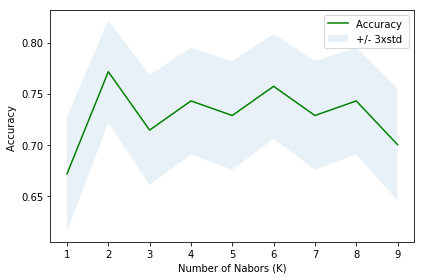

In [419]:
print('Best K is ',K," Cross validation accuracy: ",bestScore)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# Decision Tree


In [420]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

In [421]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

y_pred=clf_tree.predict(X_train)

In [422]:
TrS['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
TrS['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [423]:
!pip install pydotplus

In [424]:
TrS

{'KNN-jaccard': 0.7898550724637681,
 'KNN-f1-score': 0.7843967626576321,
 'Tree-jaccard': 0.9420289855072463,
 'Tree-f1-score': 0.940523244871071}

In [425]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [426]:
!pip install graphviz

In [427]:
import graphviz

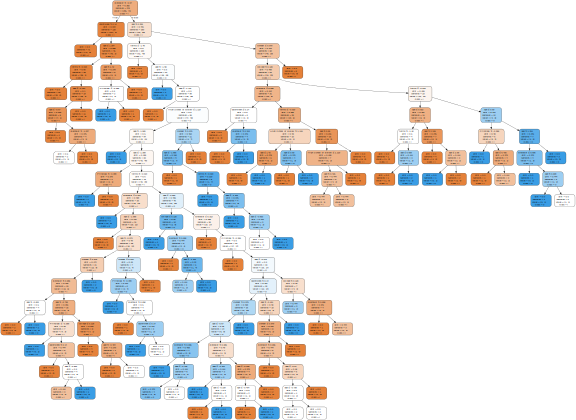

In [428]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college','dayofweek'],
                     class_names='loan_status',filled=True, rounded=True,special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')
viz_graph = graphviz.Source(graph.to_string())
viz_graph

# SVM (Support Vector Machines)


In [429]:
import scipy.optimize as opt

In [430]:
from sklearn.model_selection import train_test_split

In [431]:
from sklearn import svm

In [432]:
y_train = y_train.astype(float)

In [433]:
clf_svm = svm.LinearSVC(random_state=9)

In [434]:
clf_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=9, tol=0.0001,
     verbose=0)

In [435]:
y_pred = clf_svm.predict(X_train)

In [436]:
TrS['SVM-jaccard'] = jaccard_similarity_score(y_train, y_pred)

In [437]:
TrS['SVM-f1-score'] = f1_score(y_train, y_pred, average='weighted')

In [438]:
TrS

{'KNN-jaccard': 0.7898550724637681,
 'KNN-f1-score': 0.7843967626576321,
 'Tree-jaccard': 0.9420289855072463,
 'Tree-f1-score': 0.940523244871071,
 'SVM-jaccard': 0.7717391304347826,
 'SVM-f1-score': 0.7456876952208759}

# Logistic Regression

In [439]:
import pylab as pl

In [440]:
import scipy.optimize as opt

In [441]:
import matplotlib.pyplot as plt

In [442]:
from sklearn.linear_model import LogisticRegression

In [443]:
logc = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')


In [444]:
logc.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [445]:
y_pred = logc.predict(X_train)
y_proba = logc.predict_proba(X_train)

In [446]:
testy=y.astype(float)
testX=preprocessing.StandardScaler().fit_transform(X)
proba=logc.predict_proba(testX)
testScores={}

In [447]:
testScores['LogReg-logLoss'] = log_loss(testy, proba)

In [448]:
TrS['LogReg-jaccard']=jaccard_similarity_score(y_train, y_pred)
TrS['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
TrS['LogReg-logLoss']=log_loss(y_train, y_proba)
TrS

{'KNN-jaccard': 0.7898550724637681,
 'KNN-f1-score': 0.7843967626576321,
 'Tree-jaccard': 0.9420289855072463,
 'Tree-f1-score': 0.940523244871071,
 'SVM-jaccard': 0.7717391304347826,
 'SVM-f1-score': 0.7456876952208759,
 'LogReg-jaccard': 0.7572463768115942,
 'LogReg-f1-score': 0.7341146337750953,
 'LogReg-logLoss': 0.41745652840949493}

In [449]:
TrS['KNN-jaccard']

0.7898550724637681

In [450]:
report = pd.DataFrame(data=np.array([["KNN", TrS['KNN-jaccard'], TrS['KNN-f1-score'], np.nan],
                                     ["Decision Tree", TrS['Tree-jaccard'], TrS['Tree-f1-score'], np.nan],
                                    ["SVM", TrS['SVM-jaccard'], TrS['SVM-f1-score'], np.nan],
                                    ["LogisticRegression", TrS['LogReg-jaccard'], TrS['LogReg-f1-score'], TrS['LogReg-logLoss']]]), columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])

# Evaluation Report

In [451]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-16 20:00:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-16 20:00:04 (371 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [452]:
test1 = pd.read_csv('loan_test.csv')
test1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [453]:
test1['due_date'] = pd.to_datetime(test1['due_date'])
test1['effective_date'] = pd.to_datetime(test1['effective_date'])
test1['dayofweek'] = test1['effective_date'].dt.dayofweek
test1['weekend'] = test1['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test1['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


In [454]:
Feature = test1[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(test1['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

In [455]:
X = Feature
y = test1['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

In [456]:
testy=y.astype(float)
testX= preprocessing.StandardScaler().fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [457]:
ResultTest = {}

In [458]:
Result_KNN=clf_knn.predict(testX)
ResultTest['KNN-jaccard']=jaccard_similarity_score(testy, Result_KNN)
ResultTest['KNN-f1-score']=f1_score(testy, Result_KNN, average='weighted')

In [459]:
Result_Tree=clf_tree.predict(testX)
ResultTest['Tree-jaccard']=jaccard_similarity_score(testy, Result_Tree)
ResultTest['Tree-f1-score']=f1_score(testy, Result_Tree, average='weighted')

In [460]:
Result_SVM=clf_svm.predict(testX)
ResultTest['SVM-jaccard']=jaccard_similarity_score(testy, Result_SVM)
ResultTest['SVM-f1-score']=f1_score(testy, Result_SVM, average='weighted')

In [461]:
Result_LOG=logc.predict(testX)
proba=logc.predict_proba(testX)
ResultTest['LogReg-jaccard']=jaccard_similarity_score(testy, Result_LOG)
ResultTest['LogReg-f1-score']=f1_score(testy, Result_LOG, average='weighted')  
ResultTest['LogReg-logLoss']=log_loss(testy, proba)

In [463]:
TrS

{'KNN-jaccard': 0.7898550724637681,
 'KNN-f1-score': 0.7843967626576321,
 'Tree-jaccard': 0.9420289855072463,
 'Tree-f1-score': 0.940523244871071,
 'SVM-jaccard': 0.7717391304347826,
 'SVM-f1-score': 0.7456876952208759,
 'LogReg-jaccard': 0.7572463768115942,
 'LogReg-f1-score': 0.7341146337750953,
 'LogReg-logLoss': 0.41745652840949493}

In [464]:
ResultTest

{'KNN-jaccard': 0.7037037037037037,
 'KNN-f1-score': 0.6959210617747202,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.7302518270260205,
 'SVM-jaccard': 0.7962962962962963,
 'SVM-f1-score': 0.7583503077293734,
 'LogReg-jaccard': 0.7777777777777778,
 'LogReg-f1-score': 0.7283950617283951,
 'LogReg-logLoss': 0.456194111845911}

In [465]:
list(Feature.columns)

['Principal',
 'terms',
 'age',
 'Gender',
 'weekend',
 'dayofweek',
 'Bechalor',
 'High School or Below',
 'college']

In [466]:
report = pd.DataFrame(data=np.array([["KNN", ResultTest['KNN-jaccard'], ResultTest['KNN-f1-score'], np.nan],
                                     ["Decision Tree", ResultTest['Tree-jaccard'], ResultTest['Tree-f1-score'], np.nan],
                                    ["SVM", ResultTest['SVM-jaccard'], ResultTest['SVM-f1-score'], np.nan],
                                    ["LogisticRegression", ResultTest['LogReg-jaccard'], ResultTest['LogReg-f1-score'], ResultTest['LogReg-logLoss']]]), columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])

# Report

In [467]:
report

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.7037037037037037,0.6959210617747202,nan
Decision Tree,0.7222222222222222,0.7302518270260205,nan
SVM,0.7962962962962963,0.7583503077293734,nan
LogisticRegression,0.7777777777777778,0.7283950617283951,0.456194111845911
